In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('time_series_covid19_confirmed_US.csv')
af = pd.read_csv('time_series_covid19_deaths_US.csv')

In [2]:
# yuma = (df['Admin2'] == 'Yuma') & (df['Province_State'] == 'Arizona')
az = (df['Province_State'] == 'Arizona') | (df['Admin2'] == 'Imperial')
df2 = df.loc[az]

In [3]:
af2 = af.loc[az]

In [4]:
df2.rename(columns={'Admin2':'Dates'}, inplace=True)
df2.set_index('Dates', inplace=True)
df2 = df2.T

C:\Users\jmonz\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [5]:
af2.rename(columns={'Admin2':'Dates'}, inplace=True)
af2.set_index('Dates', inplace=True)
af2 = af2.T

In [6]:
df2.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS',
          'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], inplace=True)

In [7]:
af2.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS',
          'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'], inplace=True)

In [8]:
df2['Date'] = df2.index
df2['Date'] = pd.to_datetime(df2['Date'], format= '%m/%d/%y')
df2.set_index('Date', inplace=True)

In [9]:
af2['Date'] = af2.index
af2['Date'] = pd.to_datetime(af2['Date'], format= '%m/%d/%y')
af2.set_index('Date', inplace=True)

In [10]:
#af2
#df2

In [11]:
df2 = df2[df2.index.month >= 3]
af2 = af2[af2.index.month >= 3]

AttributeError: module 'matplotlib.pyplot' has no attribute 'update_yaxes'

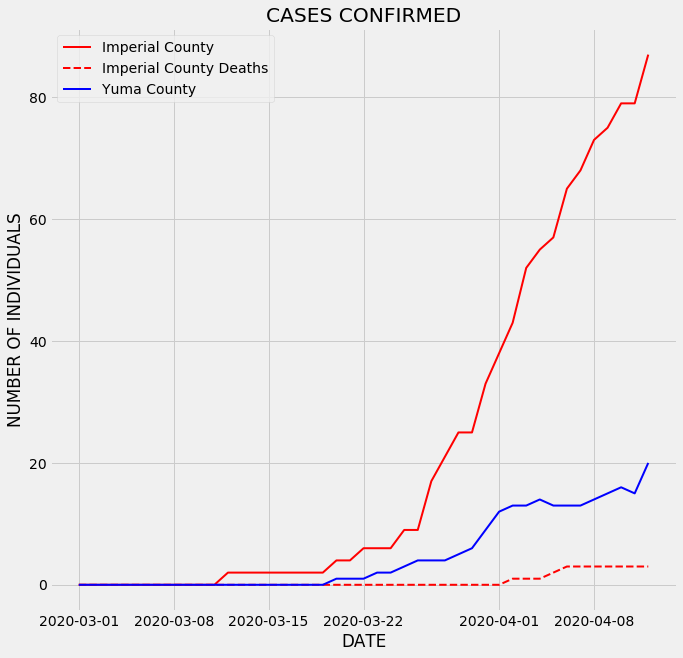

In [21]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add lines
ax.plot(df2.index.values,
         df2['Imperial'], color='red', linewidth=2, label='Imperial County')

ax.plot(af2.index.values,
        af2['Imperial'], color='red', linestyle='--', linewidth=2, label='Imperial County Deaths')

ax.plot(df2.index.values,
        df2['Yuma'], color='blue', linewidth=2, label='Yuma County')




# Set title and labels for axes
ax.set(xlabel="DATE",
       ylabel="NUMBER OF INDIVIDUALS",
       title="CASES CONFIRMED")

ax.legend()

plt.update_yaxes(tickvals=[0, 20, 40, 60, 80,100])

plt.tight_layout()

plt.savefig('Yuma & Imperial.png')

plt.show()